# Liberaries

In [1]:
import random
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

# Load dataset

In [2]:
x = np.linspace(0, 2,100)
x_2d = x.reshape(-1,1)
er = np.random.random_sample(size = 100)/2 - 0.5
y = np.sin(x_2d[:,0]**2) + er
y_2d = y.reshape(-1,1)

# Show data

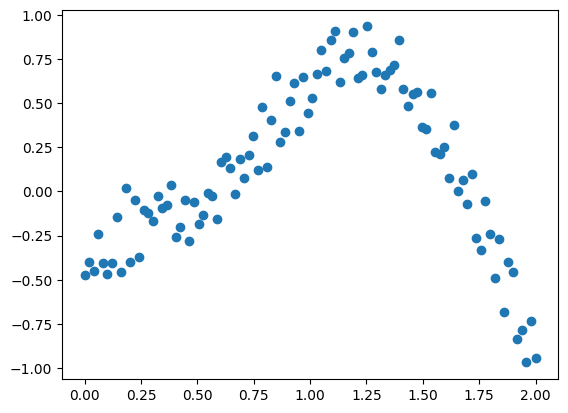

In [3]:
import matplotlib.pyplot as plt

# Create a new figure
fig = plt.figure()

# Plot the data
plt.scatter(x_2d[:,0], y)

# Show the plot
plt.show()

# Normalized data

In [4]:
x = StandardScaler().fit_transform(x_2d)
y = StandardScaler().fit_transform(y_2d)

# Training with RBF kernel

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Create the parameter grid
param_grid = {'C': [ 1e-20,1e-10,1e-5, 0.1, 1, 10,100,1000], 'gamma': [ 1e-20, 1e-10,1e-5,0.1, 1, 10,100]}


# Create the SVR model
model = SVR(kernel='rbf')

# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5, return_train_score=True, error_score='raise')

# Fit the grid search object to the data
grid_search.fit(x, y)

best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(x)

# Print the best parameters and the best score
print('CV Train score: {:.2f}'.format(grid_search.best_score_))
print("Test score: {:.2f}".format(grid_search.score(x, y)))
print('Best parameters: {}'.format(grid_search.best_params_))
print('MSE: {}'.format(np.square(np.subtract(y,y_pred.reshape(100,1))).mean()))

CV Train score: 0.36
Test score: 0.93
Best parameters: {'C': 100, 'gamma': 1}
MSE: 0.07131346860603203


# Plot estimation line

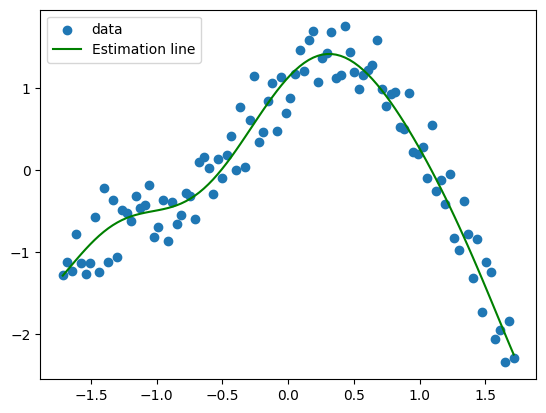

In [6]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Make predictions using the best estimator
y_pred = best_estimator.predict(x)

# Plot the data points
plt.scatter(x[:, 0], y,label='data')

# Plot the estimation line
plt.plot(x[:, 0], y_pred, c='g', label='Estimation line')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


# Training with Linear kernel

In [7]:
# Create the parameter grid
param_grid = {'C': [ 1e-20,1e-10,1e-5, 0.1, 1, 10,100,1000], 'gamma': [ 1e-20, 1e-10,1e-5,0.1, 1, 10,100]}

# Create the SVR model
model = SVR(kernel='linear')

# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5, return_train_score=True, error_score='raise')

# Fit the grid search object to the data
grid_search.fit(x, y)

best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(x)

# Print the best parameters and the best score
print('CV Train score: {:.2f}'.format(grid_search.best_score_))
print("Test score: {:.2f}".format(grid_search.score(x, y)))
print('Best parameters: {}'.format(grid_search.best_params_))
print('MSE: {}'.format(np.square(np.subtract(y,y_pred.reshape(100,1))).mean()))

CV Train score: -5.67
Test score: -0.00
Best parameters: {'C': 1e-05, 'gamma': 1e-20}
MSE: 1.0042758311987097


# Plot estimation line

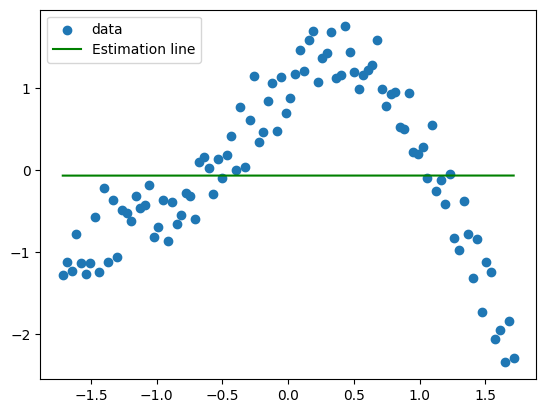

In [8]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Make predictions using the best estimator
y_pred = best_estimator.predict(x)

# Plot the data points
plt.scatter(x[:, 0], y, label='data')

# Plot the estimation line
plt.plot(x[:, 0], y_pred, c='g', label='Estimation line')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


# Training with Polynomial kernel

In [9]:
# Create the parameter grid
param_grid = {'C': [ 1e-20,1e-10,1e-5, 0.1, 1, 10],\
              'gamma': [ 1e-20, 1e-10,1e-5,0.1, 1],\
              'degree' : [3]}

# Create the SVR model
model = SVR(kernel='poly')

# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5, return_train_score=True, error_score='raise')

# Fit the grid search object to the data
grid_search.fit(x, y)

best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(x)

# Print the best parameters and the best score
print('CV Train score: {:.2f}'.format(grid_search.best_score_))
print("Test score: {:.2f}".format(grid_search.score(x, y)))
print('Best parameters: {}'.format(grid_search.best_params_))
print('MSE: {}'.format(np.square(np.subtract(y,y_pred.reshape(100,1))).mean()))

CV Train score: -5.67
Test score: -0.00
Best parameters: {'C': 1e-20, 'degree': 3, 'gamma': 1e-20}
MSE: 1.0043404981303106


# Plot estimation line

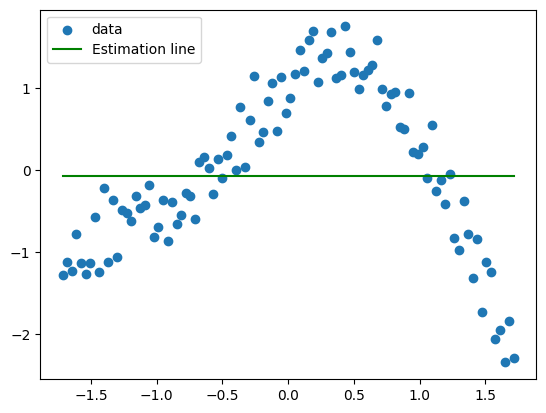

In [10]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Make predictions using the best estimator
y_pred = best_estimator.predict(x)

# Plot the data points
plt.scatter(x[:, 0], y, label='data')

# Plot the estimation line
plt.plot(x[:, 0], y_pred, c='g', label='Estimation line')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()
